In [1]:
# Import the modules of interest
import ee
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geemap.foliumap as geemap
from geemap import cartoee
import folium

# import branca.colormap as cm
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import ee
import geemap
import numpy as np
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from mpl_toolkits.axes_grid1 import make_axes_locatable

from plotting_utils import (
    get_geometries,
    get_min_max_scale,
    get_color_palettes,
    plot_gee_image,
    get_global_img_mosaic,
    url_to_image,
    blend_geom_to_img,
    get_dimensions_bbox,
    get_imgc,
)

ee.Initialize(project="ee-speckerfelix")

# Plot Global Maps - A, B, C

In [2]:
plt.rcParams.update({"axes.labelsize": 20, "font.size": 14})

colors = get_color_palettes()

projection = ccrs.Robinson(central_longitude=0)
region = [180, -88, -180, 88]

{'type': 'Image', 'bands': [{'id': 'lai_mean', 'data_type': {'type': 'PixelType', 'precision': 'float', 'min': 0, 'max': 65.53500366210938}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'lai_stdDev', 'data_type': {'type': 'PixelType', 'precision': 'float', 'min': -32.768001556396484, 'max': 32.76700210571289}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'lai_count', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]}


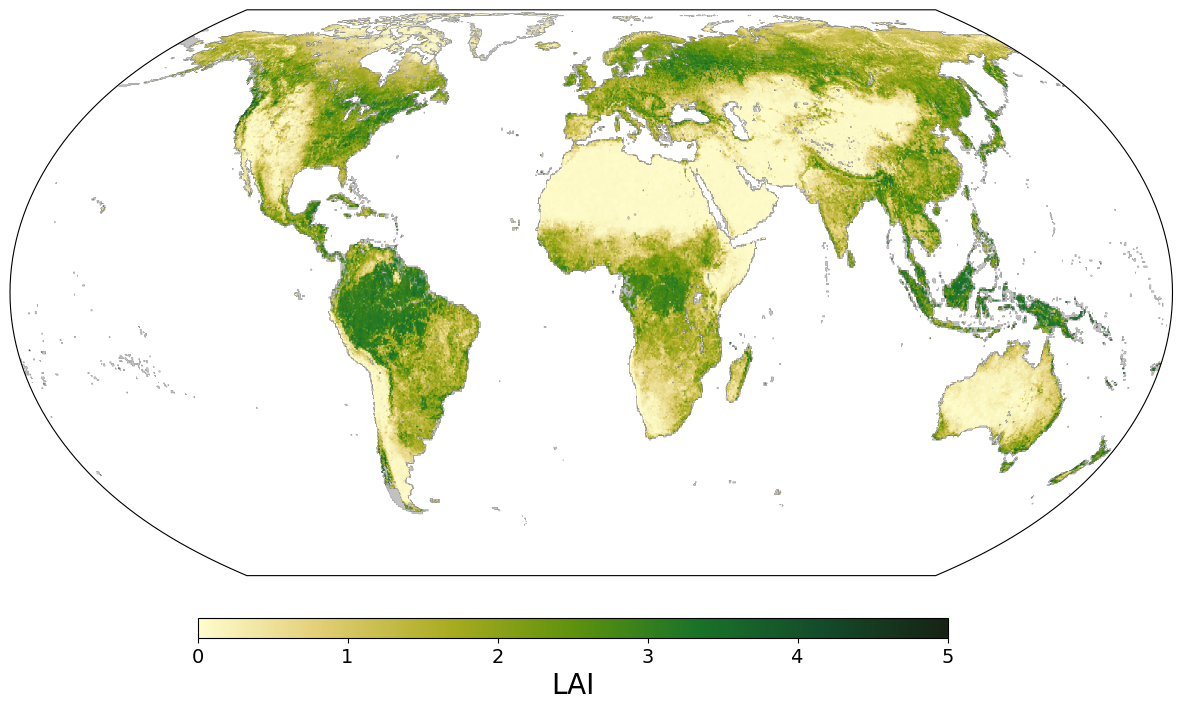

In [3]:
# 1A: LAI

trait = "lai"
plot_gee_image(
    trait,
    vis_params=colors[f"{trait}_visparams"],
    band=f"{trait}_mean",
    label="LAI",
    output_path=f"../plots/figure_2A_{trait}.png",
)

{'type': 'Image', 'bands': [{'id': 'fapar_mean', 'data_type': {'type': 'PixelType', 'precision': 'float', 'min': 0, 'max': 6.553500175476074}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'fapar_stdDev', 'data_type': {'type': 'PixelType', 'precision': 'float', 'min': -3.2768001556396484, 'max': 3.276700019836426}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'fapar_count', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]}


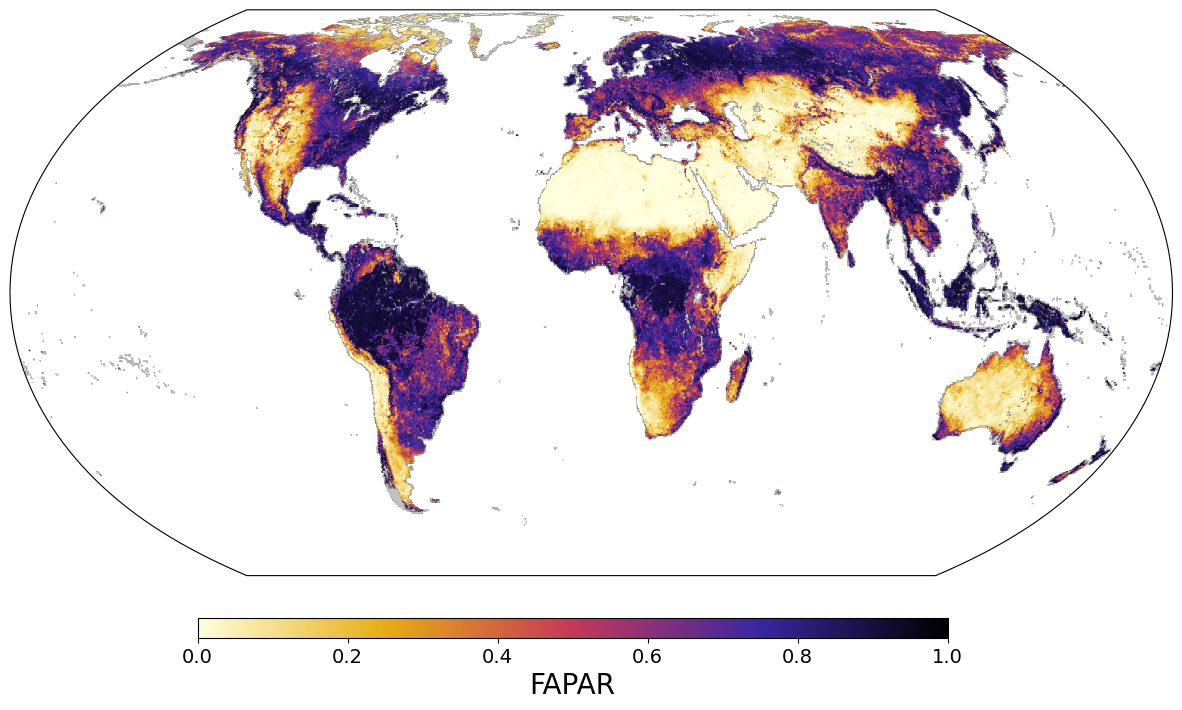

In [4]:
# 1B: FAPAR

trait = "fapar"
plot_gee_image(
    trait,
    vis_params=colors[f"{trait}_visparams"],
    band=f"{trait}_mean",
    label="FAPAR",
    output_path=f"../plots/figure_2B_{trait}.png",
)

{'type': 'Image', 'bands': [{'id': 'fcover_mean', 'data_type': {'type': 'PixelType', 'precision': 'float', 'min': 0, 'max': 6.553500175476074}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'fcover_stdDev', 'data_type': {'type': 'PixelType', 'precision': 'float', 'min': -3.2768001556396484, 'max': 3.276700019836426}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'fcover_count', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]}


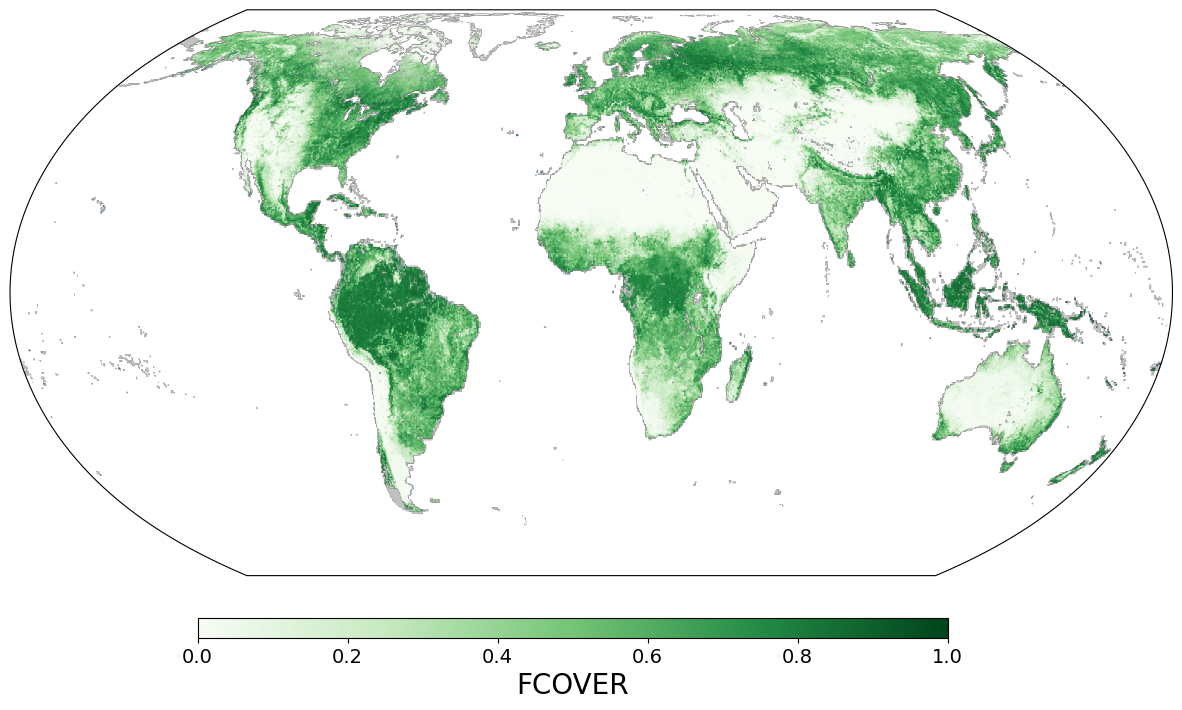

In [5]:
# 1C: FCOVER

trait = "fcover"
plot_gee_image(
    trait,
    vis_params=colors[f"{trait}_visparams"],
    band=f"{trait}_mean",
    label="FCOVER",
    output_path=f"../plots/figure_2C_{trait}.png",
)

# Plot Example Locations - D1 / D2 / D3

In [4]:
# s2_imgc = (
#     ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
#     .filterDate("2022-01-01", "2022-12-31")
#     .select(["B4", "B3", "B2"])
# )

lai_mean = get_imgc("lai", resolution="20m", year=2020).select("lai_mean")
lai_std = get_imgc("lai", resolution="20m", year=2020).select("lai_stdDev")
fcover_mean = get_imgc("fcover", resolution="20m", year=2022).select("fcover_mean")
fcover_std = get_imgc("fcover", resolution="20m", year=2022).select("fcover_stdDev")
fapar_mean = get_imgc("fapar", resolution="20m", year=2024).select("fapar_mean")
fapar_std = get_imgc("fapar", resolution="20m", year=2024).select("fapar_stdDev")

In [5]:
geometries = get_geometries()

point_geoms = {
    "destas": geometries["destas"].centroid(),
    "washington": geometries["point_geometries"]["wash"],
    "congo": geometries["point_geometries"]["congo_basin"],
}

buffered_geoms_bbox = {
    key: geom.buffer(1000).bounds() for key, geom in point_geoms.items()
}

In [6]:
# Correcting undefined variables for markers and sizes
locations = ["destas", "wash", "congo_basin"]
legendsize = 9
labelsize = 9
ticksize = 8

In [7]:
geometries["point_geometries"]["wash"]

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Point",
    "arguments": {
      "coordinates": {
        "constantValue": [
          -123.93749587447398,
          47.33471630778331
        ]
      }
    }
  }
})

In [8]:
#
print(buffered_geoms_bbox["destas"].centroid(maxError=1).getInfo())

{'type': 'Point', 'coordinates': [35.735640926359686, 7.366259975511239]}


In [9]:
print(get_dimensions_bbox(buffered_geoms_bbox["washington"]))

(1994.2867345504462, 2000.5755219799175)


In [10]:
print(get_dimensions_bbox(buffered_geoms_bbox["congo"]))

(1990.3581121785978, 1989.6967142365677)


In [12]:
## image urls
lai_mean_url = blend_geom_to_img(
    lai_mean.filterBounds(geometries["destas"]).first().divide(1000),
    geometries["destas"],
    img_vis=colors["lai_visparams"],
    geom_vis={"palette": "yellow"},
    width=6,
).getThumbURL(
    {
        "region": buffered_geoms_bbox["destas"],
        "dimensions": 512,
    }
)

lai_std_url = blend_geom_to_img(
    lai_std.filterBounds(geometries["destas"]).first().divide(1000),
    geometries["destas"],
    img_vis=colors["lai_std_visparams"],
    geom_vis={"palette": "yellow"},
    width=6,
).getThumbURL(
    {
        "region": buffered_geoms_bbox["destas"],
        "dimensions": 512,
    }
)

fapar_mean_url = (
    fapar_mean.filterBounds(geometries["point_geometries"]["wash"])
    .first()
    .divide(10000)
    .getThumbURL(
        {
            "region": buffered_geoms_bbox["washington"],
            "dimensions": 512,
            # 'min':0 ,
            # 'max': 1,
            # 'palette': colors['fapar_hex']
            **colors["fapar_visparams"],
        }
    )
)

fapar_std_url = (
    fapar_std.filterBounds(geometries["point_geometries"]["wash"])
    .first()
    .divide(10000)
    .getThumbURL(
        {
            "region": buffered_geoms_bbox["washington"],
            "dimensions": 512,
            **colors["fapar_std_visparams"],
        }
    )
)

fcover_mean_url = (
    fcover_mean.filterBounds(geometries["point_geometries"]["congo_basin"])
    .first()
    .divide(10000)
    .getThumbURL(
        {
            "region": buffered_geoms_bbox["congo"],
            "dimensions": 512,
            **colors["fcover_visparams"],
        }
    )
)

fcover_std_url = (
    fcover_std.filterBounds(geometries["point_geometries"]["congo_basin"])
    .first()
    .divide(10000)
    .getThumbURL(
        {
            "region": buffered_geoms_bbox["congo"],
            "dimensions": 512,
            **colors["fcover_std_visparams"],
        }
    )
)

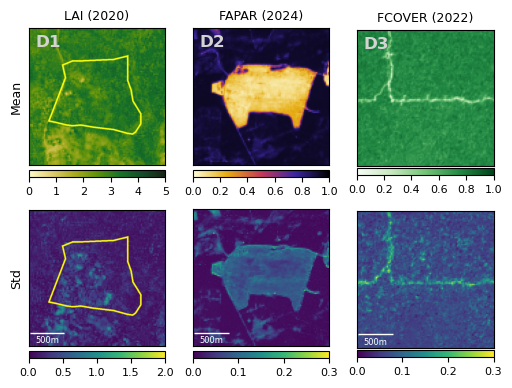

In [ ]:
color_bar_tick_size = 8
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axs = plt.subplots(
    2,
    3,  # Only 2 rows (one for images, one for colorbars)
    figsize=(6, 4.5),
    gridspec_kw={"hspace": 0.1, "wspace": 0.2},
)

# Remove axis ticks
for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

# First column: LAI Mean
axs[0, 0].imshow(url_to_image(lai_mean_url))
axs[0, 0].set_title("LAI (2020)", fontsize=labelsize)
axs[0, 0].set_ylabel("mean", fontsize=labelsize)

axs[0, 0].text(
    0.05,
    0.95,
    f"D1",
    transform=axs[0, 0].transAxes,
    fontsize=12,
    fontweight="bold",
    va="top",
    color="lightgrey",
)


# Append a **small** color bar axis
divider = make_axes_locatable(axs[0, 0])
cax1 = divider.append_axes("bottom", size="5%", pad=0.05)  # Reduce space
cb1 = fig.colorbar(
    cm.ScalarMappable(norm=colors["lai_norm"], cmap=colors["lai_cmap"]),
    cax=cax1,
    orientation="horizontal",
)
cb1.ax.set_xticks(np.arange(0, 6, 1))
cb1.ax.tick_params(labelsize=color_bar_tick_size)

# Second row: LAI Std
axs[1, 0].imshow(url_to_image(lai_std_url))
axs[1, 0].set_ylabel("Std", fontsize=labelsize)

# add scale bar to image
scalebar = AnchoredSizeBar(
    axs[1, 0].transData,
    128,  # 512 pixels = 1990 meters: 512/1990 * 500 = 128.6
    "500m",  # Label for the scale bar
    "lower left",  # Location of the scale bar
    # pad=0.1,
    color="white",
    frameon=False,
    size_vertical=1,
    fontproperties={"size": 6},
)

axs[1, 0].add_artist(scalebar)

# Append a **small** color bar axis for LAI std
divider = make_axes_locatable(axs[1, 0])
cax2 = divider.append_axes("bottom", size="5%", pad=0.05)  # Reduce space
cb2 = fig.colorbar(
    cm.ScalarMappable(norm=colors["std_lai_norm"], cmap=colors["std_cmap"]),
    cax=cax2,
    orientation="horizontal",
)
cb2.ax.tick_params(labelsize=color_bar_tick_size)


#########
# Second column: FAPAR Mean
#########

# First row: FAPAR Mean
axs[0, 1].imshow(url_to_image(fapar_mean_url))
axs[0, 1].set_title("FAPAR (2024)", fontsize=labelsize)
axs[0, 1].text(
    0.05,
    0.95,
    f"D2",
    transform=axs[0, 1].transAxes,
    fontsize=12,
    fontweight="bold",
    va="top",
    color="lightgrey",
)


divider = make_axes_locatable(axs[0, 1])
cax1 = divider.append_axes("bottom", size="5%", pad=0.05)  # Reduce space
cb1 = fig.colorbar(
    cm.ScalarMappable(norm=colors["fapar_norm"], cmap=colors["fapar_cmap"]),
    cax=cax1,
    orientation="horizontal",
)
cb1.ax.set_xticks(np.arange(0, 1.1, 0.2))
cb1.ax.tick_params(labelsize=color_bar_tick_size)

# Second row: FAPAR Std
axs[1, 1].imshow(url_to_image(fapar_std_url))
# add scale bar to image
scalebar = AnchoredSizeBar(
    axs[1, 1].transData,
    128,  # 512 pixels = 1990 meters: 512/1990 * 500 = 128.6
    "500m",  # Label for the scale bar
    "lower left",  # Location of the scale bar
    # pad=0.1,
    color="white",
    frameon=False,
    size_vertical=1,
    fontproperties={"size": 6},
)

axs[1, 1].add_artist(scalebar)

divider = make_axes_locatable(axs[1, 1])
cax2 = divider.append_axes("bottom", size="5%", pad=0.05)  # Reduce space
cb2 = fig.colorbar(
    cm.ScalarMappable(norm=colors["std_fapar_norm"], cmap=colors["std_cmap"]),
    cax=cax2,
    orientation="horizontal",
)
cb2.ax.tick_params(labelsize=color_bar_tick_size)

#########
# Third column: FCOVER Mean / Congo Basin
#########

# First row: FCOVER Mean
axs[0, 2].imshow(url_to_image(fcover_mean_url))
axs[0, 2].set_title("FCOVER (2022)", fontsize=labelsize)
axs[0, 2].text(
    0.05,
    0.95,
    f"D3",
    transform=axs[0, 2].transAxes,
    fontsize=12,
    fontweight="bold",
    va="top",
    color="lightgrey",
)

divider = make_axes_locatable(axs[0, 2])
cax1 = divider.append_axes("bottom", size="5%", pad=0.02)  # Reduce space
cb1 = fig.colorbar(
    cm.ScalarMappable(norm=colors["fcover_norm"], cmap=colors["fcover_cmap"]),
    cax=cax1,
    orientation="horizontal",
)
cb1.ax.set_xticks(np.arange(0, 1.1, 0.2))
cb1.ax.tick_params(labelsize=color_bar_tick_size)

# Second row: FCOVER Std
axs[1, 2].imshow(url_to_image(fcover_std_url))
# add scale bar to image
scalebar = AnchoredSizeBar(
    axs[1, 2].transData,
    128,  # 512 pixels = 1990 meters: 512/1990 * 500 = 128.6
    "500m",  # Label for the scale bar
    "lower left",  # Location of the scale bar
    # pad=0.1,
    color="white",
    frameon=False,
    size_vertical=1,
    fontproperties={"size": 6},
)

axs[1, 2].add_artist(scalebar)
divider = make_axes_locatable(axs[1, 2])
cax2 = divider.append_axes("bottom", size="5%", pad=0.02)  # Reduce space
cb2 = fig.colorbar(
    cm.ScalarMappable(norm=colors["std_fcover_norm"], cmap=colors["std_cmap"]),
    cax=cax2,
    orientation="horizontal",
)
cb2.ax.tick_params(labelsize=color_bar_tick_size)

plt.savefig("../plots/figure_2D.png", dpi=300, bbox_inches="tight")
plt.show()

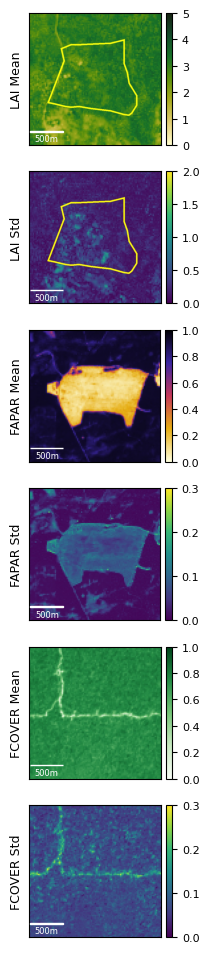

In [ ]:
color_bar_tick_size = 8
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axs = plt.subplots(
    6,
    1,  # Only 2 rows (one for images, one for colorbars)
    figsize=(2, 12),
    # gridspec_kw={"hspace": 0.1, "wspace": 0.2},
)

# Remove axis ticks
for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

#########
# A: LAI
#########

# LAI Mean
axs[0].imshow(url_to_image(lai_mean_url))

# Append a **small** color bar axis
divider = make_axes_locatable(axs[0])
cax1 = divider.append_axes("right", size="5%", pad=0.05)  # Reduce space
cb1 = fig.colorbar(
    cm.ScalarMappable(norm=colors["lai_norm"], cmap=colors["lai_cmap"]),
    cax=cax1,
    orientation="vertical",
)
cb1.ax.set_yticks(np.arange(0, 6, 1))
cb1.ax.tick_params(labelsize=color_bar_tick_size)

# LAI Std
axs[1].imshow(url_to_image(lai_std_url))

# add scale bar to image
scalebar = AnchoredSizeBar(
    axs[0].transData,
    128,  # 512 pixels = 1990 meters: 512/1990 * 500 = 128.6
    "500m",  # Label for the scale bar
    "lower left",  # Location of the scale bar
    # pad=0.1,
    color="white",
    frameon=False,
    size_vertical=1,
    fontproperties={"size": 6},
)

axs[0].add_artist(scalebar)
# add scale bar to image
scalebar = AnchoredSizeBar(
    axs[1].transData,
    128,  # 512 pixels = 1990 meters: 512/1990 * 500 = 128.6
    "500m",  # Label for the scale bar
    "lower left",  # Location of the scale bar
    # pad=0.1,
    color="white",
    frameon=False,
    size_vertical=1,
    fontproperties={"size": 6},
)
axs[1].add_artist(scalebar)

# Append a **small** color bar axis for LAI std
divider = make_axes_locatable(axs[1])
cax2 = divider.append_axes("right", size="5%", pad=0.05)  # Reduce space
cb2 = fig.colorbar(
    cm.ScalarMappable(norm=colors["std_lai_norm"], cmap=colors["std_cmap"]),
    cax=cax2,
    orientation="vertical",
)
cb2.ax.tick_params(labelsize=color_bar_tick_size)


#########
# B: FAPAR
#########

# FAPAR Mean
axs[2].imshow(url_to_image(fapar_mean_url))

scalebar = AnchoredSizeBar(
    axs[2].transData,
    128,  # 512 pixels = 1990 meters: 512/1990 * 500 = 128.6
    "500m",  # Label for the scale bar
    "lower left",  # Location of the scale bar
    # pad=0.1,
    color="white",
    frameon=False,
    size_vertical=1,
    fontproperties={"size": 6},
)

axs[2].add_artist(scalebar)


divider = make_axes_locatable(axs[2])
cax1 = divider.append_axes("right", size="5%", pad=0.05)  # Reduce space
cb1 = fig.colorbar(
    cm.ScalarMappable(norm=colors["fapar_norm"], cmap=colors["fapar_cmap"]),
    cax=cax1,
    orientation="vertical",
)
cb1.ax.set_yticks(np.arange(0, 1.1, 0.2))
cb1.ax.tick_params(labelsize=color_bar_tick_size)

# FAPAR Std
axs[3].imshow(url_to_image(fapar_std_url))

# add scale bar to image
scalebar = AnchoredSizeBar(
    axs[3].transData,
    128,  # 512 pixels = 1990 meters: 512/1990 * 500 = 128.6
    "500m",  # Label for the scale bar
    "lower left",  # Location of the scale bar
    # pad=0.1,
    color="white",
    frameon=False,
    size_vertical=1,
    fontproperties={"size": 6},
)

axs[3].add_artist(scalebar)

divider = make_axes_locatable(axs[3])
cax2 = divider.append_axes("right", size="5%", pad=0.05)  # Reduce space
cb2 = fig.colorbar(
    cm.ScalarMappable(norm=colors["std_fapar_norm"], cmap=colors["std_cmap"]),
    cax=cax2,
    orientation="vertical",
)
cb2.ax.tick_params(labelsize=color_bar_tick_size)

#########
# C: FCOVER
#########

# FCOVER Mean
axs[4].imshow(url_to_image(fcover_mean_url))


divider = make_axes_locatable(axs[4])
cax1 = divider.append_axes("right", size="5%", pad=0.05)  # Reduce space
cb1 = fig.colorbar(
    cm.ScalarMappable(norm=colors["fcover_norm"], cmap=colors["fcover_cmap"]),
    cax=cax1,
    orientation="vertical",
)
cb1.ax.set_yticks(np.arange(0, 1.1, 0.2))
cb1.ax.tick_params(labelsize=color_bar_tick_size)

# add scale bar to image
scalebar = AnchoredSizeBar(
    axs[4].transData,
    128,  # 512 pixels = 1990 meters: 512/1990 * 500 = 128.6
    "500m",  # Label for the scale bar
    "lower left",  # Location of the scale bar
    # pad=0.1,
    color="white",
    frameon=False,
    size_vertical=1,
    fontproperties={"size": 6},
)
axs[4].add_artist(scalebar)


# FCOVER Std
axs[5].imshow(url_to_image(fcover_std_url))
# add scale bar to image
scalebar = AnchoredSizeBar(
    axs[5].transData,
    128,  # 512 pixels = 1990 meters: 512/1990 * 500 = 128.6
    "500m",  # Label for the scale bar
    "lower left",  # Location of the scale bar
    # pad=0.1,
    color="white",
    frameon=False,
    size_vertical=1,
    fontproperties={"size": 6},
)

axs[5].add_artist(scalebar)
divider = make_axes_locatable(axs[5])
cax2 = divider.append_axes("right", size="5%", pad=0.05)  # Reduce space
cb2 = fig.colorbar(
    cm.ScalarMappable(norm=colors["std_fcover_norm"], cmap=colors["std_cmap"]),
    cax=cax2,
    orientation="vertical",
)
cb2.ax.tick_params(labelsize=color_bar_tick_size)


# axs[0].set_title("LAI (2020)", fontsize=labelsize)
# axs[2].set_title("FAPAR (2024)", fontsize=labelsize)
# axs[4].set_title("FCOVER (2022)", fontsize=labelsize)

axs[0].set_ylabel("LAI Mean", fontsize=labelsize)
axs[2].set_ylabel("FAPAR Mean", fontsize=labelsize)
axs[4].set_ylabel("FCOVER Mean", fontsize=labelsize)

axs[1].set_ylabel("LAI Std", fontsize=labelsize)
axs[3].set_ylabel("FAPAR Std", fontsize=labelsize)
axs[5].set_ylabel("FCOVER Std", fontsize=labelsize)


# axs[0].text(
#     0.04,
#     0.95,
#     f"A1",
#     transform=axs[0].transAxes,
#     fontsize=12,
#     fontweight="bold",
#     va="top",
#     color="lightgrey",
# )

# axs[1].text(
#     0.04,
#     0.95,
#     f"A2",
#     transform=axs[1].transAxes,
#     fontsize=12,
#     fontweight="bold",
#     va="top",
#     color="lightgrey",
# )

# axs[2].text(
#     0.04,
#     0.95,
#     f"B1",
#     transform=axs[2].transAxes,
#     fontsize=12,
#     fontweight="bold",
#     va="top",
#     color="lightgrey",
# )

# axs[3].text(
#     0.04,
#     0.95,
#     f"B2",
#     transform=axs[3].transAxes,
#     fontsize=12,
#     fontweight="bold",
#     va="top",
#     color="lightgrey",
# )


# axs[4].text(
#     0.04,
#     0.95,
#     f"C1",
#     transform=axs[4].transAxes,
#     fontsize=12,
#     fontweight="bold",
#     va="top",
#     color="lightgrey",
# )
# axs[5].text(
#     0.04,
#     0.95,
#     f"C2",
#     transform=axs[5].transAxes,
#     fontsize=12,
#     fontweight="bold",
#     va="top",
#     color="lightgrey",
# )


plt.savefig("../plots/figure_2_examples.png", dpi=300, bbox_inches="tight")
plt.show()